# 💳 Project Two: Credit Card Fraud Detection
---
## 📌 Dataset Overview
This notebook uses a large-scale **financial transactions dataset** designed for **fraud detection** tasks.

The dataset contains millions of transaction records, where the main goal is to **predict whether a transaction is fraudulent or legitimate** based on transaction details such as type, amount, and account balance changes.

---
## 🎯 Target Variable (Class Label)
The main label in this dataset is:

- **isFraud**
  - `1` → Fraudulent transaction  
  - `0` → Legitimate transaction  

✅ This is a highly **imbalanced classification problem** (fraud cases are rare compared to normal transactions).

---
## 🧾 Key Columns (Features)
Each transaction is described using multiple features:

| Column | Description |
|--------|-------------|
| step | Time step index representing transaction order over time |
| type | Transaction type (e.g., TRANSFER, CASH_OUT, PAYMENT, CASH_IN) |
| amount | Transaction amount |
| nameOrig | Sender account ID (origin) |
| oldbalanceOrg | Sender balance **before** transaction |
| newbalanceOrig | Sender balance **after** transaction |
| nameDest | Receiver account ID (destination) |
| oldbalanceDest | Receiver balance **before** transaction |
| newbalanceDest | Receiver balance **after** transaction |
| isFlaggedFraud | System flag for suspicious transactions (rule-based signal) |
| isFraud | ✅ Target label (fraud or not fraud) |

---
## 🎯 Objective
The objective of this project is to build **fraud detection classification models** that can:
- Identify fraudulent transactions accurately
- Handle extreme class imbalance
- Optimize evaluation metrics like **Precision, Recall, and ROC-AUC**
- Choose a decision threshold based on **business risk tradeoffs**

---
## ⚖️ Why This Dataset is Challenging
- Extremely **imbalanced target** (fraud is a tiny fraction of the data)
- Real-world-like transaction behavior
- Requires careful evaluation (Accuracy alone is misleading)
- Needs **sampling techniques** and **threshold tuning** for optimal fraud detection

---
## 🔎 Expected Observations
- Fraud occurs more frequently in specific transaction types like **TRANSFER** and **CASH_OUT**
- Fraudulent transactions often show suspicious balance patterns  
  (e.g., balance not updated correctly after transfer)
- The dataset requires focusing on **Recall** to reduce missed fraud cases  
  while maintaining reasonable **Precision** to avoid blocking legitimate users

---
## 🧠 Models & Techniques Used
- **EDA & Class Imbalance Visualization**
- Sampling techniques:
  - Undersampling
  - Oversampling
  - SMOTE
- Models:
  - Random Forest
  - XGBoost (if available)
- Evaluation:
  - Precision / Recall
  - ROC-AUC & PR-AUC
  - Confusion Matrix
  - Threshold tuning for business decisions

---
## 🛠 Tools & Libraries
- Python
- NumPy & Pandas
- Matplotlib & Seaborn
- Scikit-learn
- Imbalanced-learn (SMOTE / Sampling)
- XGBoost (optional)

In [89]:
import numpy as np 
import pandas as pd
df = pd.read_csv("AIML Dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# 🧹 Data Cleaning & Preprocessing
---

## 🧼 Data Cleaning
Before training any machine learning models, the dataset was carefully inspected to ensure data quality and consistency.

The following checks were performed:
- Missing values
- Duplicate records
- Correct data types
- Identification of non-informative features

In [90]:
df.shape

(6362620, 11)

In [91]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [93]:
# detect duplicates
df.duplicated().sum()

np.int64(0)

## 📊 Exploratory Data Analysis (EDA)
---
Visualizing the class imbalance and transaction distributions.

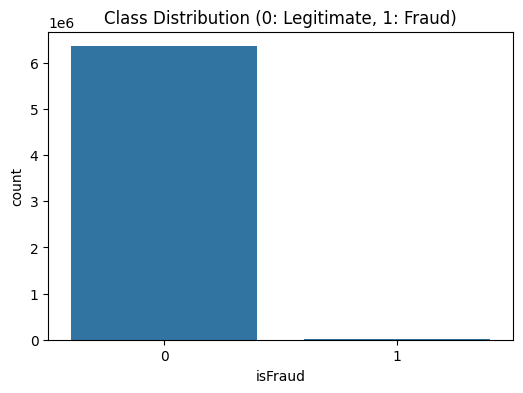

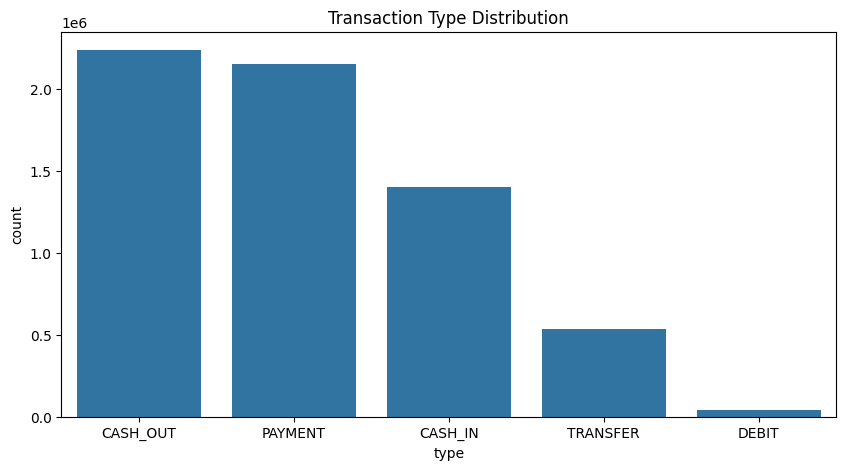

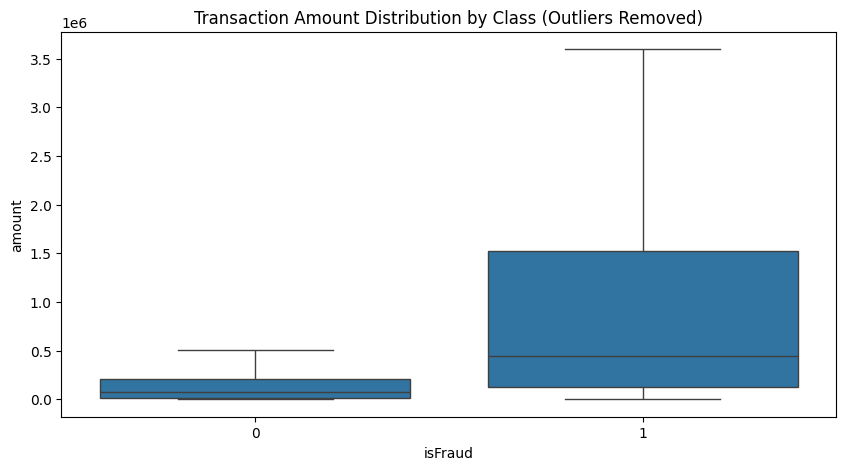

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Class Imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

# Visualize Transaction Type Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.show()

# Fraud amounts
plt.figure(figsize=(10, 5))
sns.boxplot(x='isFraud', y='amount', data=df, showfliers=False)
plt.title('Transaction Amount Distribution by Class (Outliers Removed)')
plt.show()

In [95]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [96]:
# Check missing values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [97]:
# Check duplicated rows
df.duplicated().sum()

np.int64(0)

In [98]:
# Drop ID-like columns
df = df.drop(columns=["nameOrig", "nameDest"])

In [99]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


## ⚙️ Data Preprocessing

In [100]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### Encoding Categorical Features

In [101]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [102]:
df = pd.get_dummies(df, columns=["type"], drop_first=True)

In [103]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,True


### 2️ Feature Scaling
Feature scaling was **not applied** in this project.

This decision was made because:
- The selected models (Random Forest / XGBoost) are **tree-based models**
- Tree-based algorithms are invariant to feature scaling
- Avoiding scaling preserves the original monetary meaning of transaction amounts and balances

In [104]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numerical_cols = df.drop(columns=["isFraud"]).columns

# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### Train-Test Split

In [105]:
# Features
X = df.drop(columns=['isFraud'])
# Target
y = df['isFraud']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (5090096, 11)
X_test shape: (1272524, 11)


### Handling Class Imbalance: Undersampling
To avoid MemoryError on this large dataset, we use **Undersampling** instead of SMOTE. We will reduce the majority class to match the minority class.

In [107]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

print(f"Resampled Training Shape: {X_train.shape}")
print(f"Class distribution after resampling:\n{y_train.value_counts()}")

Resampled Training Shape: (13140, 11)
Class distribution after resampling:
isFraud
0    6570
1    6570
Name: count, dtype: int64


## 🧪 Models Implemented
The following models were selected for this task:

- **Random Forest Classifier**
  - Robust to noise
  - Handles non-linear relationships
  - Works well with imbalanced datasets

- **XGBoost Classifier**
  - High-performance gradient boosting algorithm
  - Handles class imbalance using `scale_pos_weight`
  - Widely used in real-world fraud detection systems

## Random Forest Model

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#  Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]


In [109]:
# Report + Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[1254420   16461]
 [      5    1638]]

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9870    0.9935   1270881
           1     0.0905    0.9970    0.1659      1643

    accuracy                         0.9871   1272524
   macro avg     0.5452    0.9920    0.5797   1272524
weighted avg     0.9988    0.9871    0.9924   1272524



In [110]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC: {roc_auc:.4f}")


ROC-AUC: 0.9995


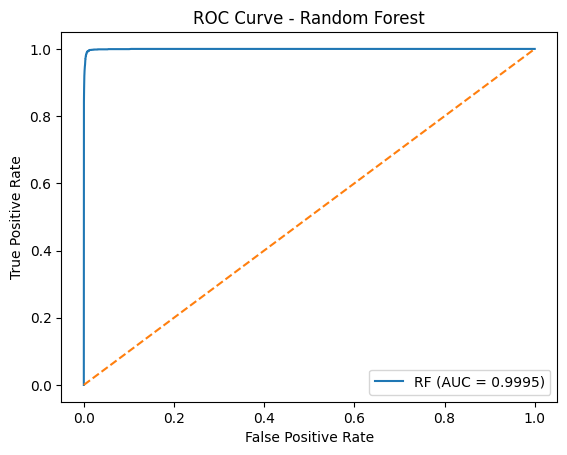

In [111]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"RF (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

## XGBoost Model

In [112]:
from xgboost import XGBClassifier
import time

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

start_time = time.time()
xgb_model.fit(X_train, y_train)
print(f"XGBoost Training Time: {time.time() - start_time:.2f} seconds")

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

XGBoost Training Time: 0.41 seconds


## 📈 Model Comparison & Evaluation

XGBoost Confusion Matrix:
[[1259510   11371]
 [      3    1640]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9911    0.9955   1270881
           1     0.1260    0.9982    0.2238      1643

    accuracy                         0.9911   1272524
   macro avg     0.5630    0.9946    0.6097   1272524
weighted avg     0.9989    0.9911    0.9945   1272524


XGBoost ROC-AUC: 0.9997


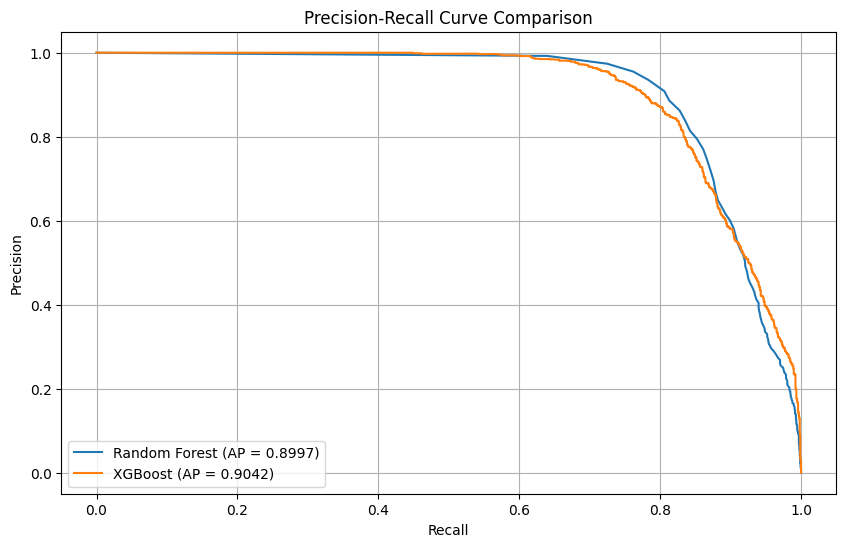

In [113]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))

roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"\nXGBoost ROC-AUC: {roc_auc_xgb:.4f}")

# Precision-Recall Curve Comparison
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)

ap_rf = average_precision_score(y_test, y_prob)
ap_xgb = average_precision_score(y_test, y_prob_xgb)

plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.4f})')
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {ap_xgb:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()